In [26]:
using DelimitedFiles
using Plots

start_idx = 751
end_idx = 2000

PLOT_FILENAME = "../plots/5_plot.png"
ORIGINAL_EXTRAPOLATION_DATA = "../data/original_extrapolation.txt"
PINN_EXTRAPOLATION_DATA = "../data/5_extrapolation.txt"

"../data/5_extrapolation.txt"

In [27]:
loaded_data = readdlm(ORIGINAL_EXTRAPOLATION_DATA)
original_data = Array{Float64}(loaded_data)
original_data = original_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
  14.6317   96.6114   9.24194  141.068    -0.0     -0.0   74.3924
  15.2285   96.3166   8.93825  141.068    -0.0     -0.0   74.1262
  16.6184   96.0229   9.02819  141.068    -0.0     -0.0   73.8617
  18.7944   95.7302   9.13437  141.068    -0.0     -0.0   73.5978
  21.7461   95.4385   9.23901  141.068    -0.0     -0.0   73.3345
  25.459    95.1479   9.34213  141.068    -0.0     -0.0   73.0712
  29.915    94.8583   9.44376  141.068    -0.0     -0.0   72.806
  35.0924   94.5697   9.54392  141.068    -0.0     -0.0   72.5285
  40.9659   94.2822   9.64264  141.068    -0.0     -0.0   72.2628
  47.507    93.9958   9.73994  141.068    -0.0     -0.0   72.0089
   ⋮                                                ⋮    
 127.096   126.942   12.5162    56.1008  137.343   -0.0  102.443
 126.913   126.888   12.5802    55.6879   55.0494  -0.0  102.287
 126.627   126.546   12.6434    55.3558   99.9893  -0.0  102.095
 126.231   126.259   12.706     55.0991   -0.0     -0.0  101.862

In [28]:
loaded_data = readdlm(PINN_EXTRAPOLATION_DATA)
pinn_data = Array{Float64}(loaded_data)
pinn_data = pinn_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
   4.9282    75.1668  5.19603  138.741     0.0115679  44.6509      62.0418
   5.38154   74.7811  5.21983  138.867     0.0115679   0.0136186   61.6786
   6.43046   74.3976  5.25469  138.867     0.0115679   0.0136186   61.3076
   8.07933   74.0164  5.28933  138.867     0.0115679   0.0136186   60.9389
  10.3263    73.6375  5.32377  138.867     0.0115679   0.0136186   60.5724
  13.1664    73.2609  5.358    138.867     0.0115679   0.0136186   60.2082
  16.5907    72.8865  5.39203  138.867     0.0115679   0.0136186   59.8461
  20.5868    72.5144  5.42585  138.867     0.0115679   0.0136186   59.4861
  25.1387    72.1446  5.45946  138.867     0.0115679   0.0136186   59.1284
  30.2269    71.777   5.49288  138.867     0.0115679   0.0136186   58.7728
   ⋮                                                   ⋮          
 158.547    152.498   8.12517   27.4821  183.329       0.0282128  128.012
 157.927    152.759   8.19778   26.406   156.661       0.0282128  128.179
 157.173   

In [29]:
loaded_data = readdlm("../data/simple_extrapolation.txt")
simple_data = Array{Float64}(loaded_data)
simple_data = simple_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
   4.42151   65.6914  4.66443  147.24     -5.00582e-6  40.4868      54.9792
   4.82005   65.3678  4.68651  147.363    -5.00582e-6   6.96907e-5  54.6679
   5.73947   65.0461  4.71956  147.363    -5.00582e-6   6.96907e-5  54.3483
   7.17899   64.7263  4.75241  147.363    -5.00582e-6   6.96907e-5  54.0306
   9.13159   64.4084  4.78507  147.363    -5.00582e-6   6.96907e-5  53.7147
  11.5878    64.0923  4.81754  147.363    -5.00582e-6   6.96907e-5  53.4007
  14.5355    63.7781  4.84982  147.363    -5.00582e-6   6.96907e-5  53.0885
  17.9605    63.4657  4.88191  147.363    -5.00582e-6   6.96907e-5  52.7782
  21.846     63.1551  4.91382  147.363    -5.00582e-6   6.96907e-5  52.4696
  26.173     62.8464  4.94553  147.363    -5.00582e-6   6.96907e-5  52.1629
   ⋮                                                    ⋮           
 114.68     110.218   6.33058   78.5971  135.194        7.45595e-5  93.5924
 114.216    110.405   6.38736   77.7616  115.505        7.45595e-5  93.

In [30]:
using Statistics

parameter = 7
simple_data1 = simple_data[:, parameter]
original_data1 = original_data[:, parameter]
pinn_data1 = pinn_data[:, parameter]

println("MSE simple model: ", mean(abs2, simple_data1 .- original_data1))
println("MSE PINN model: ", mean(abs2, simple_data1 .- pinn_data1))


MSE simple model: 192.72946921738017
MSE PINN model: 351.24140574036056


In [37]:
# Define parameter information with units and descriptions
const PARAM_INFO = Dict(
    1 => (title="Left Ventricular Pressure", ylabel="Pressure (mmHg)", description="LV Pressure"),
    2 => (title="Systemic Arterial Pressure", ylabel="Pressure (mmHg)", description="Arterial Pressure"), 
    3 => (title="Systemic Venous Pressure", ylabel="Pressure (mmHg)", description="Venous Pressure"),
    4 => (title="Left Ventricular Volume", ylabel="Volume (mL)", description="LV Volume"),
    5 => (title="Aortic Valve Flow", ylabel="Flow (mL/s)", description="Aortic Flow"),
    6 => (title="Mitral Valve Flow", ylabel="Flow (mL/s)", description="Mitral Flow"),
    7 => (title="Systemic Flow", ylabel="Flow (mL/s)", description="Systemic Flow")
)

function plot_differences(idx; plt_title=nothing)
    param_info = PARAM_INFO[idx]
    title_text = isnothing(plt_title) ? param_info.title : plt_title
    
    x = 1:size(original_data, 1)
    
    y1 = original_data[:, idx]
    y2 = pinn_data[:, idx]
    y3 = simple_data[:, idx]
    
    plot(
        x, y1, 
        label="Original", 
        lw=2,
        title=title_text, 
        xlabel="Time Steps",
        ylabel=param_info.ylabel,
        titlefontsize=10, 
        legendfontsize=8,
        guidefontsize=8
    )
    plot!(x, y2, label="PINN", lw=2, linestyle=:dash)
    # plot!(x, y3, label="Simple", lw=2, linestyle=:dot)
end

function plot_diff_layout(filename::String)
    layout = @layout [a b c; d e f; g h i]

    p = plot(
        plot_differences(1),  # Left Ventricular Pressure
        plot_differences(2),  # Systemic Arterial Pressure  
        plot_differences(3),  # Systemic Venous Pressure
        plot_differences(4),  # Left Ventricular Volume
        plot_differences(5),  # Aortic Valve Flow
        plot_differences(6),  # Mitral Valve Flow
        plot_differences(7),  # Systemic Flow
        layout = layout,
        size = (1200, 900),
        plot_title = "Cardiovascular Model Comparison: Original vs PINN vs Simple",
        plot_titlefontsize = 14,
        margin = 5Plots.mm
    )

    savefig(p, filename)
    return p
end

# Alternative compact layout function
# function plot_diff_compact_layout(filename::String)
#     layout = @layout [a b c d; e f g h]

#     p = plot(
#         plot_differences(1),  # Left Ventricular Pressure
#         plot_differences(2),  # Systemic Arterial Pressure  
#         plot_differences(3),  # Systemic Venous Pressure
#         plot_differences(4),  # Left Ventricular Volume
#         plot_differences(5),  # Aortic Valve Flow
#         plot_differences(6),  # Mitral Valve Flow
#         plot_differences(7),  # Systemic Flow
#         plot(),               # Empty plot
#         layout = layout,
#         size = (1400, 700),
#         plot_title = "Cardiovascular Model Comparison",
#         plot_titlefontsize = 14,
#         margin = 4Plots.mm
#     )

#     savefig(p, filename)
#     return p
# end

plot_diff_layout (generic function with 1 method)

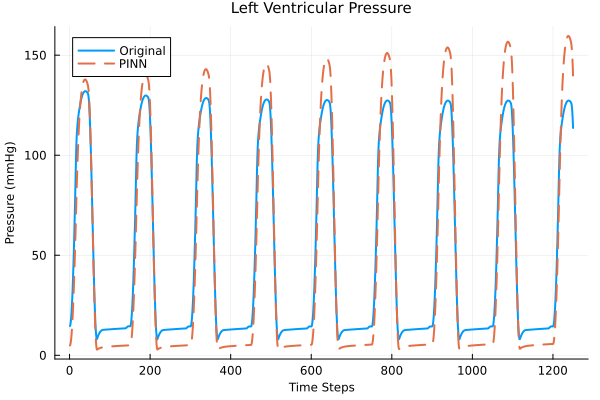

In [38]:
plot_differences(1)

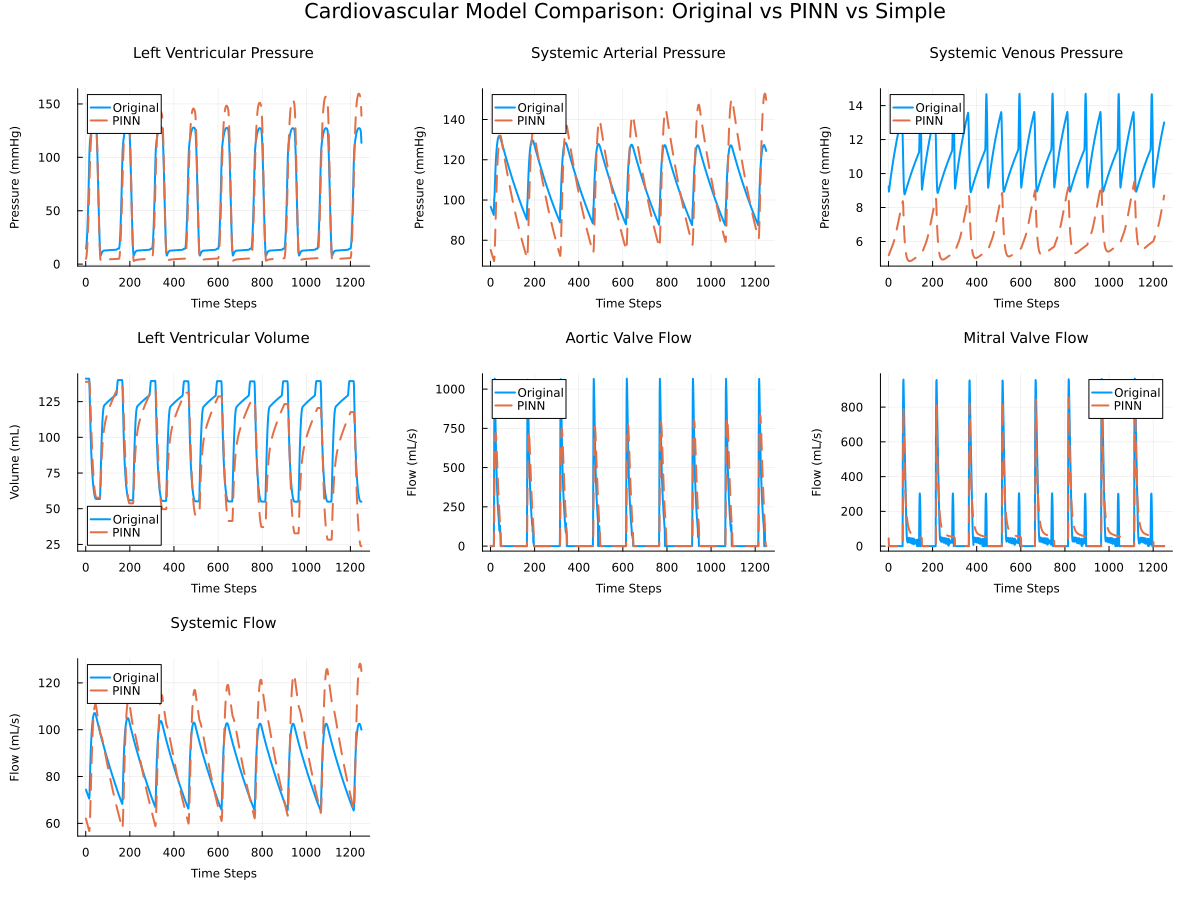

In [39]:
plot_diff_layout(PLOT_FILENAME)